### Data Preprocessing for C-3BO

In [74]:
#data management imports
import os
import glob

#preprocessing/augmentation
import numpy as np
from PIL import Image, ImageFilter

#visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#other useful libraries
import tqdm

In [1]:
pwd

'C:\\Users\\leode\\isef_2022-23'

In [6]:
dataDir = "C:\\Users\\leode\\Blood-Cancer_Data"

class Dataset:
    def __init__(self, mainDir,):
        assert os.dir.exists(dataDir) and len(os.listdir(mainDir)) > 2
        self.mainDir = mainDir
        self.curr = mainDir[0]
    def changeCurr(to): self.curr = mainDir[to]
    def information(self, sort=False):
        return ''
    #compares datasets based on criteria
    def visualize(self, how='bar'):
        pass
    def __new__(cls, *args, **kwargs):
        if cls._instance is None:
            cls._instance = cls(*args, **kwargs)
        return cls._instance
    


In [63]:
datasets = list()

#every root we will be ignoring right now
ignore = [
    "acute_myeloid_leukemia",
    "ALL_IDB2",
    "SN-AM-BALL-MM",
    "genetic_data",
    "chronic_myeloid_leukemia"
]
inIgnore = lambda path: sum([i in path for i in ignore]) > 0
nonTypes = set({'.rar', '.txt', '.xyc'})

for (root, dirs, files) in os.walk(dataDir, topdown=True):
    if inIgnore(root) or root==dataDir: continue
    if len(files)>0 and files[0][-4:] in nonTypes: continue
    datasets.append(root)
    print(root)

C:\Users\leode\Blood-Cancer_Data\ALL_IDB1\im
C:\Users\leode\Blood-Cancer_Data\ALL_Tehran
C:\Users\leode\Blood-Cancer_Data\Healthy-Cells
C:\Users\leode\Blood-Cancer_Data\Healthy-Cells\Platelets
C:\Users\leode\Blood-Cancer_Data\multiple_myeloma


________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________
.png is not supported
________________________________________________________________________________________________________________________


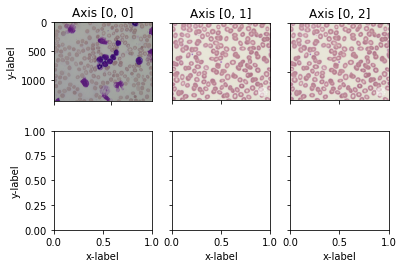

In [103]:
fig, axs = plt.subplots(2, 3)

#visualize the images
r = 0
c = 0
for D in datasets:
    images = glob.glob(f"{D}/*")
    if len(images)==0: continue
    try:
        img = mpimg.imread(images[0])
        axs[r, c].imshow(img)
        axs[r, c].set_title(f"Axis {[r, c]}")
        #imgplot = plt.imshow(img)
        #plt.show()
    except SyntaxError: print(f"{images[0][-4:]} is not supported")
    except Exception as e: print(type(e))
    finally:
        if (c==2):
            c = 0
            r += 1
        else: c += 1
        print('_'*120)
    
for ax in axs.flat: ax.set(xlabel='x-label', ylabel='y-label')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [116]:
#do this with preprocessing!

counter = 0
for D in datasets:
    for path in tqdm.tqdm(glob.glob(f"{D}/*")):
        try:
            img = Image.open(path)  
            img.save(f"{dataDir}\\Parent\\{counter}_cls.jpg")
            
            counter += 1
        except IOError:
            pass

100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:26<00:00,  4.12it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 86/86 [00:16<00:00,  5.26it/s]
